In [1]:
# import dependencies
import numpy as np
import csv
import matplotlib.pyplot as plt

In [2]:
# input parameters, change this section only
file_prefix="20230311-0001_"
file_num = 50
file_suffix = ".csv"
time_res = 2 * 1e-3

Gain = 1000
responsivity = 1.04

A1_fac = 1000   # 1000 for mV, 1 for V
A2_fac = 1      # 1000 for mV, 1 for V
balanced_fac = 1000 # 1000 for mV, 1 for V

# average n parameter // we need to ensure total raw data points is the multiple of n
n = 10

In [3]:
# polarization rotation speed change helper, do not change
def helper_calc(diff, delta, prev):
    return 2 * np.arcsin((1/2)*np.abs(diff - prev) ) * (1 / delta)

In [4]:
# data processing
global_diff = []
global_rot_speed = []
global_rot_speed_balanced = []
global_time = []
global_a1 = []
global_a2 = []
global_diff_balanced = []


for i in range(1,file_num,1):
    filename = ""
    if i < 10:
        filename = file_prefix + "0" + str(i) + file_suffix
    else:
        filename = file_prefix + str(i) + file_suffix


    with open(filename, newline='') as csvfile:
        reader = csv.DictReader(csvfile)
        count = 0
        for row in reader:
            if count >= 1:
                #global_diff.append(float(row["abs((A-B)/(A+B))"]))
                global_a1.append(float(row["Channel A"]))
                global_a2.append(float(row["Channel B"]))
                global_diff_balanced.append(abs(float(row["Channel C"])/balanced_fac/Gain/responsivity))
            count = count + 1

print("total number of raw data points:"+str(len(global_a1)))

for i in range(len(global_a1)):
    global_time.append(time_res*i)
    global_diff.append(abs(global_a1[i]/A1_fac - global_a2[i]/A2_fac))


total number of raw data points:24696


In [5]:
# trim data
tot_valid_pts = int(len(global_time) / n) * n
print("number of valid raw data pts: "+str(tot_valid_pts))
global_time_arr = np.array(global_time)
global_time_arr_1 = global_time_arr[0:tot_valid_pts]
global_diff_arr = np.array(global_diff)
global_diff_arr_1 = global_diff_arr[0:tot_valid_pts]
global_balanced_arr = np.array(global_diff_balanced)
global_balanced_arr_1 = global_balanced_arr[0:tot_valid_pts]

number of valid raw data pts: 20000


In [6]:
# apply average filter
diff_avg = np.average(global_diff_arr_1.reshape(-1, n), axis=1)
t_avg = np.average(global_time_arr_1.reshape(-1, n), axis=1)
balanced_avg = np.average(global_balanced_arr_1.reshape(-1, n), axis=1)

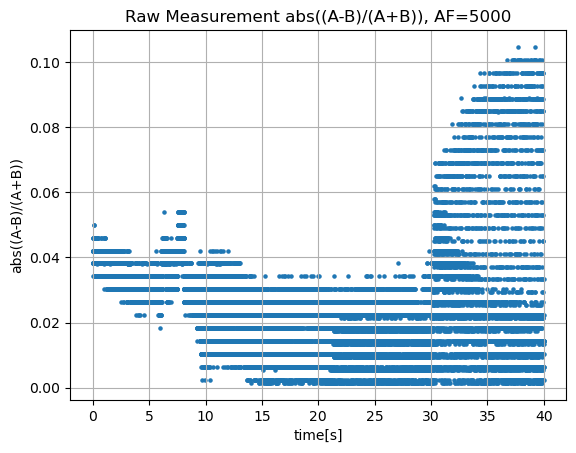

In [7]:
# plot "abs((A-B)/(A+B))" channel output, after average filter
plt.scatter(global_time_arr_1, global_diff_arr_1,s=5)
plt.xlabel("time[s]")
plt.ylabel("abs((A-B)/(A+B))")
plt.title("Raw Measurement abs((A-B)/(A+B)), AF="+str(n))
plt.grid("on")

for i in range(len(diff_avg)):
    prev_temp = 0.0
    if i!=0:
        global_rot_speed.append(helper_calc(float(diff_avg[i]) , float(time_res*n), float(diff_avg[i-1])))
        global_rot_speed_balanced.append(helper_calc(float(balanced_avg[i]) , float(time_res*n), float(balanced_avg[i-1])))
    else:
        global_rot_speed.append(0.0)
        global_rot_speed_balanced.append(0.0)

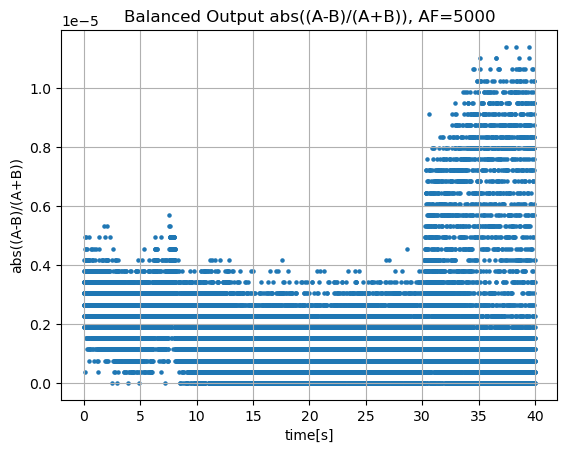

In [8]:
# plot "abs((A-B)/(A+B))" channel output, after average filter
plt.scatter(global_time_arr_1, global_balanced_arr_1,s=5)
plt.xlabel("time[s]")
plt.ylabel("abs((A-B)/(A+B))")
plt.title("Balanced Output abs((A-B)/(A+B)), AF="+str(n))
plt.grid("on")


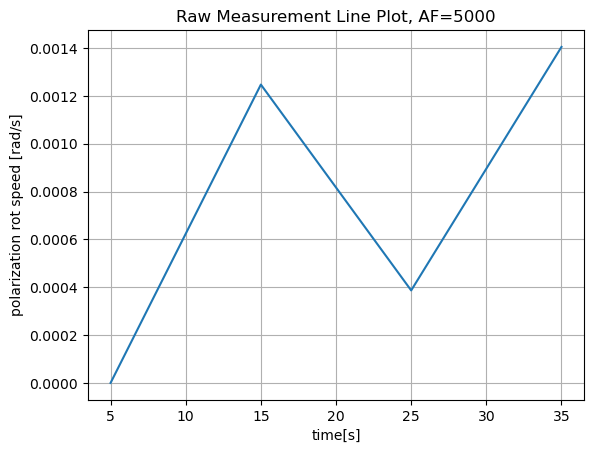

In [9]:
# Plot Line
plt.plot(t_avg, global_rot_speed)
plt.grid("on")
plt.xlabel("time[s]")
plt.title("Raw Measurement Line Plot, AF="+str(n))
plt.ylabel("polarization rot speed [rad/s]")
plt.show()

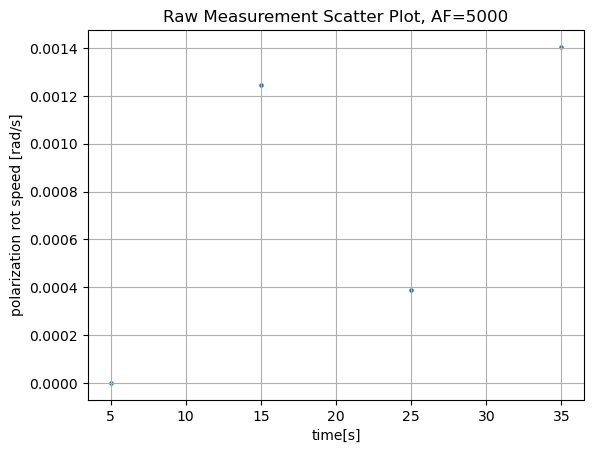

In [10]:
# Plot Scatter
plt.scatter(t_avg, global_rot_speed, s=5)
plt.grid("on")
plt.xlabel("time[s]")
plt.title("Raw Measurement Scatter Plot, AF="+str(n))
plt.ylabel("polarization rot speed [rad/s]")
plt.show()

Text(0.5, 0, 'time[s]')

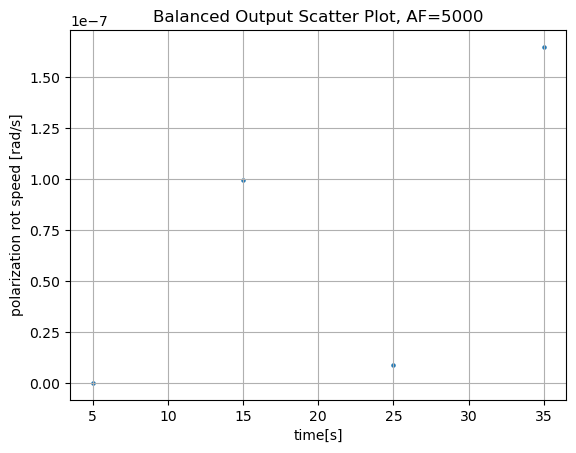

In [11]:
plt.scatter(t_avg, global_rot_speed_balanced, s=5)
plt.title("Balanced Output Scatter Plot, AF="+str(n))
plt.ylabel("polarization rot speed [rad/s]")
plt.grid("on")
plt.xlabel("time[s]")